#  <font color='blue'>Mean Machine - Ridge Regression<font>

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. The tasks herewith are to
* use a pre-built implementation of regression to run polynomial regression
* use a pre-built implementation of regression to run polynomial regression with L2 penalty
* choose best L2 penalty using cross-validation.
* assess the final fit using test data.

# 1: Set the path that includes all relevant files

In [1]:
import os                                               # 操作系统用来管理文件路径
os.chdir("C:\Users\stevenwsy\Desktop\Steven - Python")  # 将路径改为 "C:\Users\stevenwsy\Desktop\Steven - Python"

# 注意：你们要把 "C:\Users\stevenwsy\Desktop\Steven - Python" 改成在你们电脑里面的路径

# 2: Import all relevant packages

In [2]:
import numpy as np     # 用来做数学运算
import pandas as pd    # 用来处理数据表

# 将所有图都在 Notebook 里显示
%matplotlib inline               
import matplotlib.pyplot as plt  # 用来画图

from sklearn.linear_model import Ridge                    # 岭回归
from sklearn.cross_validation import train_test_split     # 做交叉验证，划分训练集和测试集
from sklearn.utils import shuffle                         # 打乱训练和验证集数据

# 3: Test polynomial_features function

In [3]:
def polynomial_features( data, deg=2 ):
    data_copy = data.copy()
    
    if isinstance(data_copy, pd.DataFrame):
        column_label = data_copy.columns.values.tolist()[0]
        data_copy.rename(columns={column_label: 'power_1'})
    else:
        data_copy = pd.DataFrame( np.array(data_copy), columns=['power_1'] )
    
    # in our example the type of data_copy['power_1'] is int64, and
    # negative number will show up when the degree is high, hence we
    # change its type to float64 to handle large number
    data_copy['power_1'] = data_copy['power_1'].astype('float64')
    
    for i in range(1,deg):
        data_copy['power_'+str(i+1)] = data_copy['power_'+str(i)]*data_copy['power_1']
    return data_copy

# 4: Load and plot house sales data

In [4]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort_values( ['sqft_living','price'] )
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [5]:
def plot_data(data):    
    plt.plot( data['power_1'], data['price'], 'b.', label = 'data' )
    plt.xlabel('sqft_living')
    plt.ylabel('price')

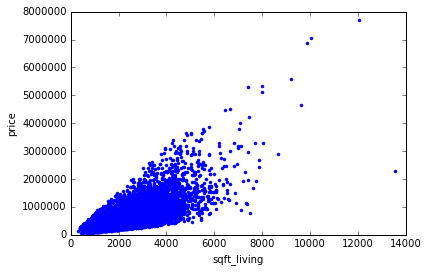

In [6]:
data = polynomial_features( sales['sqft_living'], 1 )
data['price'] = sales['price'].values # add price to the data since it's the target
plot_data(data)

# 5: Ridge Regression

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [7]:
def ridge_regression( data, deg, l2_penalty ):
    input_value = data.iloc[:,0:deg].values
    output_value = data['price'].values
    
    model = Ridge( alpha=l2_penalty, normalize=True )
    model.fit( input_value, output_value )
    return model

In [8]:
def plot_predictions( data, model ):
    plot_data(data)

    deg = len(model.coef_)
    
    x_pred = polynomial_features(data['power_1'], deg )
    y_pred = model.predict( x_pred.values )
    
    # plot predictions
    plt.plot(x_pred['power_1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')

In [9]:
def print_coefficients( model ):        
    deg = len(model.coef_)
    # Get learned parameters as a list
    w = list( np.hstack((model.intercept_,model.coef_)) )

    # Numpy has a nifty function to print out polynomials in a pretty way
    print 'Learned polynomial for degree ' + str(deg) + ':\n'
    w.reverse()
    print np.poly1d(w)

In [10]:
def ridge_output( set, deg=15, l2_penalty=1e-5 ):
    data = polynomial_features( set['sqft_living'], deg )
    data['price'] = set['price'].values # add price to the data since it's the target
    model = ridge_regression( data, deg, l2_penalty )
    print_coefficients( model )
    plot_predictions( data, model )

Learned polynomial for degree 15:

           15             14             13             12
1.637e-54 x  + 4.541e-51 x  - 1.243e-46 x  - 3.171e-42 x 
              11             10             9             8
 - 4.536e-38 x  - 3.844e-34 x  + 7.808e-31 x + 9.786e-26 x
              7             6             5             4             3
 + 1.781e-21 x + 9.718e-18 x - 2.379e-13 x - 2.861e-09 x + 3.739e-05 x
            2
 - 0.07848 x + 174.4 x + 1.947e+05


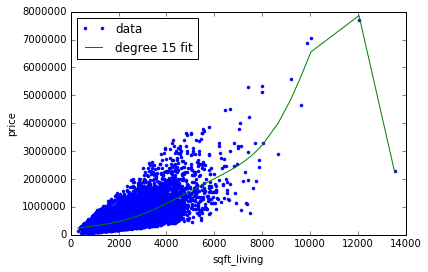

In [11]:
ridge_output( sales )

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable. 

With the L2 penalty specified above, fit the model and print out the learned weights.

# Observe overfitting

The polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance.

In [12]:
(set_1_2, set_3_4) = train_test_split(sales, train_size=0.5, random_state=0)
(set_1, set_2) = train_test_split(set_1_2, train_size=0.5, random_state=0)
(set_3, set_4) = train_test_split(set_3_4, train_size=0.5, random_state=0)
set_1 = set_1.sort_values( ['sqft_living','price'] )
set_2 = set_2.sort_values( ['sqft_living','price'] )
set_3 = set_3.sort_values( ['sqft_living','price'] )
set_4 = set_4.sort_values( ['sqft_living','price'] )

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

Learned polynomial for degree 15:

           15             14             13             12
-9.79e-54 x  - 1.151e-49 x  - 6.735e-46 x  + 3.643e-42 x 
             11             10             9             8
 + 1.63e-37 x  + 2.514e-33 x  + 2.261e-29 x + 4.349e-26 x
              7             6             5             4             3
 - 2.272e-21 x - 3.551e-17 x - 1.218e-13 x + 2.203e-09 x + 1.332e-05 x
            2
 - 0.06257 x + 222.6 x + 1.458e+05


Learned polynomial for degree 15:

            15             14             13             12
-7.849e-52 x  - 1.486e-48 x  + 2.062e-44 x  + 3.297e-40 x 
              11             10             9             8
 + 2.832e-36 x  + 1.407e-32 x  - 1.662e-29 x - 1.153e-24 x
             7             6             5             4             3
 - 1.16e-20 x - 4.042e-17 x + 3.162e-13 x + 3.234e-09 x - 2.195e-06 x
            2
 - 0.02672 x + 202.3 x + 1.446e+05


Learned polynomial for degree 15:

           15             14         

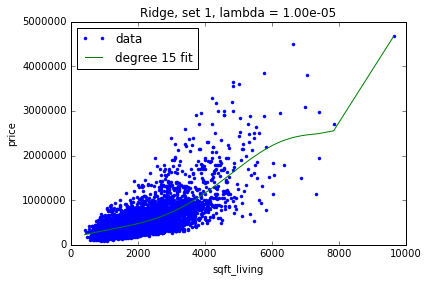

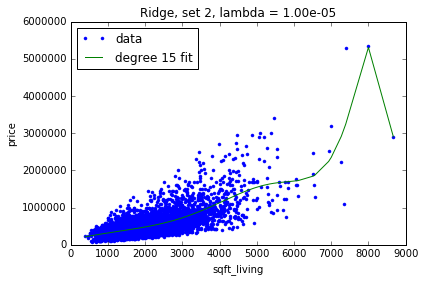

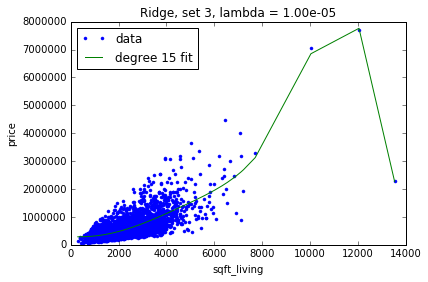

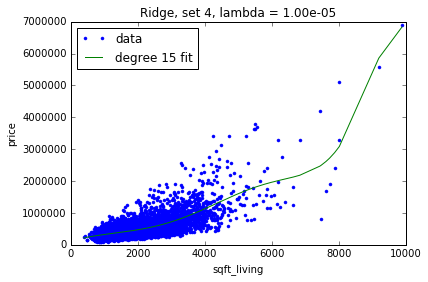

In [13]:
l2_small_penalty = 1e-5

for i, set in enumerate([set_1, set_2, set_3, set_4]):
    plt.figure()
    ridge_output( set )
    print '\n'
    plt.title( 'Ridge, set %d, lambda = %.2e' %(i+1,l2_small_penalty) )

The four curves should differ from one another a lot, as should the learned coefficients.

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of aforementioned models looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above.

Learned polynomial for degree 15:

           15             14             13             12
1.171e-55 x  + 1.204e-51 x  + 1.263e-47 x  + 1.359e-43 x 
             11             10             9             8
 + 1.51e-39 x  + 1.741e-35 x  + 2.097e-31 x + 2.641e-27 x
              7             6             5            4            3
 + 3.456e-23 x + 4.596e-19 x + 5.912e-15 x + 6.69e-11 x + 5.87e-07 x
            2
 + 0.00377 x + 21.01 x + 4.623e+05


Learned polynomial for degree 15:

           15             14             13             12
4.491e-55 x  + 4.979e-51 x  + 5.393e-47 x  + 5.751e-43 x 
              11             10             9             8
 + 6.073e-39 x  + 6.378e-35 x  + 6.689e-31 x + 7.021e-27 x
              7             6             5             4             3
 + 7.374e-23 x + 7.685e-19 x + 7.751e-15 x + 7.162e-11 x + 5.569e-07 x
             2
 + 0.003449 x + 19.35 x + 4.649e+05


Learned polynomial for degree 15:

            15            14           

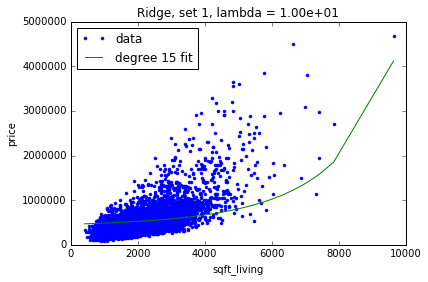

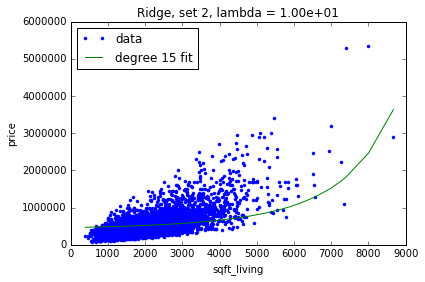

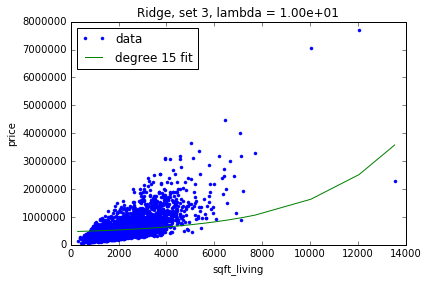

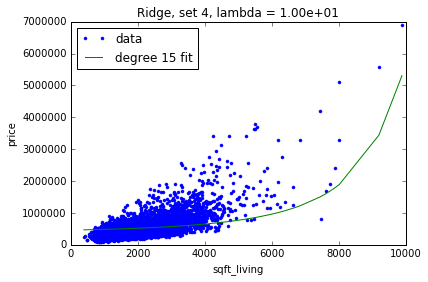

In [14]:
l2_large_penalty = 10
for i, set in enumerate([set_1, set_2, set_3, set_4]):
    plt.figure()
    ridge_output( set, l2_penalty=l2_large_penalty)
    print '\n'
    plt.title( 'Ridge, set %d, lambda = %.2e' %(i+1,l2_large_penalty) )

These curves should vary a lot less, now that you applied a high degree of regularization.

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use `seed=1` to get consistent answer.)

In [15]:
(training_and_validation, test) = train_test_split(sales, 
                                  train_size=0.9, random_state=0)
training_validation_shuffled = shuffle( training_and_validation, 
                               random_state=0 )

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [16]:
n = len(training_validation_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1944)
1 (1945, 3889)
2 (3890, 5834)
3 (5835, 7779)
4 (7780, 9724)
5 (9725, 11669)
6 (11670, 13614)
7 (13615, 15559)
8 (15560, 17504)
9 (17505, 19450)


Let us familiarize ourselves with array slicing with dataframe. To extract a continuous slice from a dataframe, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `training_validation_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [17]:
training_validation_shuffled[0:10] # rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4629,4151800195,20150330T000000,650000.0,3,1.00,1410,4840,1.0,0,2,...,6,1230,180,1942,0,98033,47.6646,-122.204,1410,5400
19591,8682261140,20140618T000000,564000.0,2,2.00,1690,4500,1.0,0,0,...,8,1690,0,2004,0,98053,47.7133,-122.031,1640,4500
4310,9528101032,20150325T000000,600000.0,3,3.00,1520,1800,3.0,0,0,...,7,1520,0,2003,0,98115,47.6822,-122.326,1520,1500
4938,8077200470,20140718T000000,590000.0,4,2.50,2290,11072,2.0,0,0,...,9,2290,0,1986,0,98074,47.6283,-122.030,2340,9774
11722,9527300200,20140825T000000,465000.0,4,2.75,2190,3267,2.0,0,0,...,8,2190,0,2004,0,98072,47.7751,-122.168,2190,3619
14554,4027700666,20150426T000000,780000.0,4,2.50,3180,9603,2.0,0,2,...,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261
14363,8126300610,20150401T000000,436800.0,3,1.75,2080,12714,2.0,0,0,...,8,1540,540,1984,0,98052,47.7056,-122.162,2080,12107
8534,2387000110,20141110T000000,898000.0,2,1.75,1490,9874,1.0,0,0,...,7,1490,0,1963,0,98004,47.6246,-122.199,2280,9869
5877,9826701735,20141112T000000,449950.0,3,2.00,1880,3048,2.0,0,0,...,7,1880,0,1902,0,98122,47.6031,-122.303,1680,3600
15542,1001200050,20140923T000000,259000.0,4,1.50,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. Dataframe has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `training_validation_shuffled` dataframe.

In [18]:
n = len(training_validation_shuffled)
first_two = training_validation_shuffled[0:2]
last_two = training_validation_shuffled[n-2:n]
print first_two.append(last_two)

               id             date     price  bedrooms  bathrooms  \
4629   4151800195  20150330T000000  650000.0         3       1.00   
19591  8682261140  20140618T000000  564000.0         2       2.00   
3744   7974700112  20140714T000000  650000.0         4       2.50   
7474   7955040130  20140805T000000  460000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
4629          1410      4840     1.0           0     2     ...          6   
19591         1690      4500     1.0           0     0     ...          8   
3744          2530      6500     1.5           0     0     ...          8   
7474          1370      8467     1.0           0     0     ...          7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
4629         1230            180      1942             0    98033  47.6646   
19591        1690              0      2004             0    98053  47.7133   
3744         1720            810  

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [19]:
def k_fold_cross_validation( k, l2_penalty, data, deg, output_name, features ):
    validation_error = 0.0;
    
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation = data[start:end+1]
        train = data[0:start].append( data[end+1:n] )
        
        model = ridge_regression( train, deg, l2_penalty )
        
        y_true = validation['price'].values
        y_pred = model.predict( validation[features].values )
        
        validation_error += ((y_true- y_pred)**2).sum()
        
    return validation_error / k

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in $[10^{-3}, 10^{-2.5}, 10^{-2}, 10^{-1.5}, ..., 10^5]$ (to get this in Python, you can use this Numpy function: `np.logspace(-3, 5, num=17)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `training_validation_shuffled` when generating polynomial features!

In [20]:
deg = 15
data = polynomial_features( training_validation_shuffled['sqft_living'], deg )
my_features = data.columns.tolist()

output_name = 'price';
data[output_name] = training_validation_shuffled[output_name].values
valid_error = list()
l2_panalty_set = np.logspace(-3, 5, num=17)
for l2_penalty in l2_panalty_set :
    i_valid_error = k_fold_cross_validation( k, l2_penalty, data, deg, output_name, my_features )
    valid_error.append( i_valid_error )
    print "lambda: %.3f, validation error: %.10e" %(l2_penalty, i_valid_error)

lambda: 0.001, validation error: 3.8150507308e+14
lambda: 0.003, validation error: 2.1321592713e+14
lambda: 0.010, validation error: 1.3378040972e+14
lambda: 0.032, validation error: 1.1978396087e+14
lambda: 0.100, validation error: 1.1961078403e+14
lambda: 0.316, validation error: 1.2114377827e+14
lambda: 1.000, validation error: 1.3155735000e+14
lambda: 3.162, validation error: 1.7269520552e+14
lambda: 10.000, validation error: 2.2392020020e+14
lambda: 31.623, validation error: 2.4641221440e+14
lambda: 100.000, validation error: 2.5712768261e+14
lambda: 316.228, validation error: 2.6249251995e+14
lambda: 1000.000, validation error: 2.6456908918e+14
lambda: 3162.278, validation error: 2.6527334615e+14
lambda: 10000.000, validation error: 2.6550117264e+14
lambda: 31622.777, validation error: 2.6557374194e+14
lambda: 100000.000, validation error: 2.6559674317e+14


You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

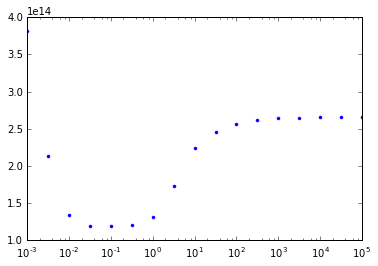

In [21]:
# Plot the l2_penalty values in the x axis and 
# the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.xscale('log')
plt.plot( l2_panalty_set, valid_error, '.' )

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`.  This way, your final model will be trained on the entire dataset.

In [22]:
best_l2_penalty = l2_panalty_set[ np.argmin(valid_error) ]

test_data = polynomial_features( test['sqft_living'], deg )
output_name = 'price';
test_data[output_name] = test[output_name].values

model = ridge_regression( test_data, deg, best_l2_penalty )
y_true = test_data[output_name].values
y_pred = model.predict( test_data[my_features].values )
test_error = ((y_true- y_pred)**2).sum()

print "best lambda: %.3f, test error: %.10e" %(best_l2_penalty, test_error)

best lambda: 0.100, test error: 1.3232126142e+14


Learned polynomial for degree 15:

           15             14             13             12
2.174e-53 x  + 1.195e-49 x  + 5.291e-46 x  + 9.259e-43 x 
              11             10             9             8
 - 1.755e-38 x  - 3.188e-34 x  - 3.681e-30 x - 3.444e-26 x
              7             6             5             4             3
 - 2.619e-22 x - 1.326e-18 x + 2.489e-15 x + 1.683e-10 x + 2.267e-06 x
            2
 + 0.01751 x + 99.43 x + 2.041e+05


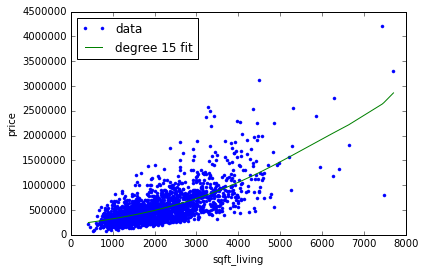

In [23]:
test = test.sort_values( ['sqft_living','price'] )
ridge_output( test, deg, best_l2_penalty )